In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r"C:\Semester 5\AIML\AIML Mini Project\data\accident_prediction_india.csv")

print(df.shape)
print(df.dtypes)
print(df.isnull().sum())  
df.head()

(3000, 22)
State Name                     object
City Name                      object
Year                            int64
Month                          object
Day of Week                    object
Time of Day                    object
Accident Severity              object
Number of Vehicles Involved     int64
Vehicle Type Involved          object
Number of Casualties            int64
Number of Fatalities            int64
Weather Conditions             object
Road Type                      object
Road Condition                 object
Lighting Conditions            object
Traffic Control Presence       object
Speed Limit (km/h)              int64
Driver Age                      int64
Driver Gender                  object
Driver License Status          object
Alcohol Involvement            object
Accident Location Details      object
dtype: object
State Name                       0
City Name                        0
Year                             0
Month                            0

,State Name,City Name,Year,Month,Day of Week,Time of Day,Accident Severity,Number of Vehicles Involved,Vehicle Type Involved,Number of Casualties,...,Road Type,Road Condition,Lighting Conditions,Traffic Control Presence,Speed Limit (km/h),Driver Age,Driver Gender,Driver License Status,Alcohol Involvement,Accident Location Details
0,Jammu and Kashmir,Unknown,2021,May,Monday,1:46,Serious,5,Cycle,0,...,National Highway,Wet,Dark,Signs,61,66,Male,NaN,Yes,Curve
1,Uttar Pradesh,Lucknow,2018,January,Wednesday,21:30,Minor,5,Truck,5,...,Urban Road,Dry,Dusk,Signs,92,60,Male,NaN,Yes,Straight Road
2,Chhattisgarh,Unknown,2023,May,Wednesday,5:37,Minor,5,Pedestrian,6,...,National Highway,Under Construction,Dawn,Signs,120,26,Female,NaN,No,Bridge
3,Uttar Pradesh,Lucknow,2020,June,Saturday,0:31,Minor,3,Bus,10,...,State Highway,Dry,Dark,Signals,76,34,Female,Valid,Yes,Straight Road
4,Sikkim,Unknown,2021,August,Thursday,11:21,Minor,5,Cycle,7,...,Urban Road,Wet,Dusk,Signs,115,30,Male,NaN,No,Intersection


Pre-processing and Data Cleaning :

In [2]:
#Strip whitespace and ensure time is string
df['Time of Day'] = df['Time of Day'].astype(str).str.strip()

#    Try parsing time in consistent format (%H:%M)
#    This avoids warnings and handles malformed times
def clean_time(t):
    try:
        return pd.to_datetime(t, format='%H:%M').time()
    except:
        return None  # Return None for unparseable times

df['Time Clean'] = df['Time of Day'].apply(clean_time)

#    Extract hour only if time is valid
def extract_hour(t):
    try:
        return pd.to_datetime(t, format='%H:%M').hour
    except:
        return None

df['Hour'] = df['Time of Day'].apply(extract_hour)

#sample output
df[['Time of Day', 'Time Clean', 'Hour']].head(10)


,Time of Day,Time Clean,Hour
0,1:46,01:46:00,1
1,21:30,21:30:00,21
2,5:37,05:37:00,5
3,0:31,00:31:00,0
4,11:21,11:21:00,11
5,8:4,08:04:00,8
6,18:55,18:55:00,18
7,11:40,11:40:00,11
8,8:26,08:26:00,8
9,2:1,02:01:00,2


In [3]:
import numpy as np

# Convert all text values to lowercase and strip whitespace
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].astype(str).str.strip().str.lower()

# Replace string "unknown", "none", etc. with np.nan
df.replace(['unknown', 'none', '', 'nan'], np.nan, inplace=True)


In [4]:
print(df.columns.tolist())


['State Name', 'City Name', 'Year', 'Month', 'Day of Week', 'Time of Day', 'Accident Severity', 'Number of Vehicles Involved', 'Vehicle Type Involved', 'Number of Casualties', 'Number of Fatalities', 'Weather Conditions', 'Road Type', 'Road Condition', 'Lighting Conditions', 'Traffic Control Presence', 'Speed Limit (km/h)', 'Driver Age', 'Driver Gender', 'Driver License Status', 'Alcohol Involvement', 'Accident Location Details', 'Time Clean', 'Hour']


In [5]:
# 🧽 Normalize all column names to lowercase and remove extra spaces
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')


In [6]:
# Drop rows missing key predictive fields
df.dropna(subset=[
    'accident_severity',
    'weather_conditions',
    'road_type',
    'road_condition',
    'lighting_conditions',
    'hour'
], inplace=True)

# Reset index after drop
df.reset_index(drop=True, inplace=True)


In [7]:
# 🔁 List of columns to convert
categorical_columns = [
    'accident_severity', 'vehicle_type_involved', 'weather_conditions',
    'road_type', 'road_condition', 'lighting_conditions',
    'traffic_control_presence', 'driver_gender', 'driver_license_status',
    'alcohol_involvement', 'accident_location_details',
    'day_of_week', 'month'
]

# ⏬ Convert to category type
for col in categorical_columns:
    df[col] = df[col].astype('category')


In [8]:
# 🗑️ Drop ID/location-related or redundant columns
df.drop(columns=[
    'state_name', 'city_name', 'time_of_day', 'time_clean',
    'accident_location_details'  
], inplace=True)


In [9]:
# 🔍 Basic snapshot of cleaned data
print("Cleaned dataset shape:", df.shape)
df.head() 

# 🧼 Check types and unique values
df.info()

# 🔁 View categories for a few key features
for col in ['accident_severity', 'weather_conditions', 'road_type', 'hour']:
    print(f"\n🟩 {col.upper()} values:\n", df[col].value_counts())

Cleaned dataset shape: (3000, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   year                         3000 non-null   int64   
 1   month                        3000 non-null   category
 2   day_of_week                  3000 non-null   category
 3   accident_severity            3000 non-null   category
 4   number_of_vehicles_involved  3000 non-null   int64   
 5   vehicle_type_involved        3000 non-null   category
 6   number_of_casualties         3000 non-null   int64   
 7   number_of_fatalities         3000 non-null   int64   
 8   weather_conditions           3000 non-null   category
 9   road_type                    3000 non-null   category
 10  road_condition               3000 non-null   category
 11  lighting_conditions          3000 non-null   category
 12  traffic_control_presence    

In [10]:
df.to_csv(r"C:\Semester 5\AIML\AIML Mini Project\data\accident_data_cleaned.csv", index=False)


In [11]:
df = pd.read_csv(r"C:\Semester 5\AIML\AIML Mini Project\data\accident_data_cleaned.csv")
df.head()

,year,month,day_of_week,accident_severity,number_of_vehicles_involved,vehicle_type_involved,number_of_casualties,number_of_fatalities,weather_conditions,road_type,road_condition,lighting_conditions,traffic_control_presence,speed_limit_(km/h),driver_age,driver_gender,driver_license_status,alcohol_involvement,hour
0,2021,may,monday,serious,5,cycle,0,4,hazy,national highway,wet,dark,signs,61,66,male,NaN,yes,1
1,2018,january,wednesday,minor,5,truck,5,4,hazy,urban road,dry,dusk,signs,92,60,male,NaN,yes,21
2,2023,may,wednesday,minor,5,pedestrian,6,5,foggy,national highway,under construction,dawn,signs,120,26,female,NaN,no,5
3,2020,june,saturday,minor,3,bus,10,5,rainy,state highway,dry,dark,signals,76,34,female,valid,yes,0
4,2021,august,thursday,minor,5,cycle,7,1,foggy,urban road,wet,dusk,signs,115,30,male,NaN,no,11


Visualization :

C:\Users\hp\AppData\Local\Temp\ipykernel_6392\2794067777.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='accident_severity', palette='Set2')


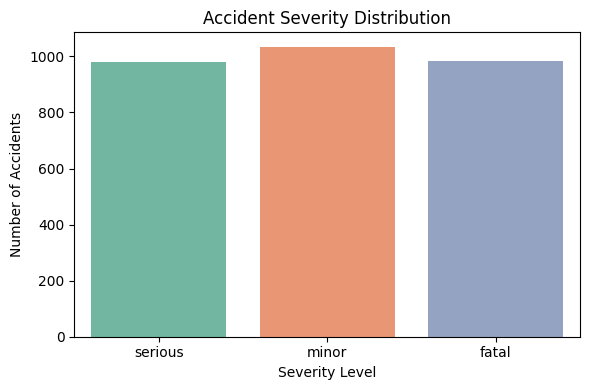

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.countplot(data=df, x='accident_severity', palette='Set2')
plt.title('Accident Severity Distribution')
plt.xlabel('Severity Level')
plt.ylabel('Number of Accidents')
plt.tight_layout()
plt.show()

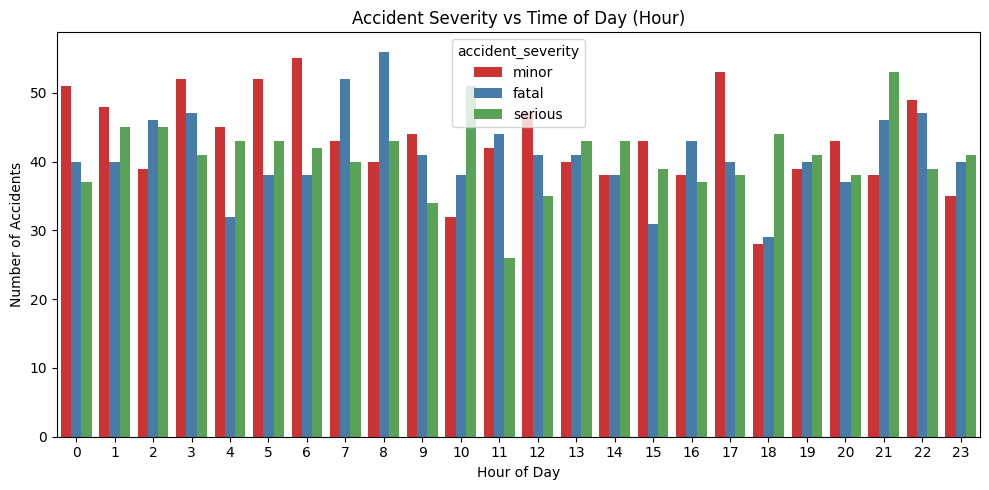

In [13]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='hour', hue='accident_severity', palette='Set1')
plt.title('Accident Severity vs Time of Day (Hour)')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Accidents')
plt.tight_layout()
plt.show()


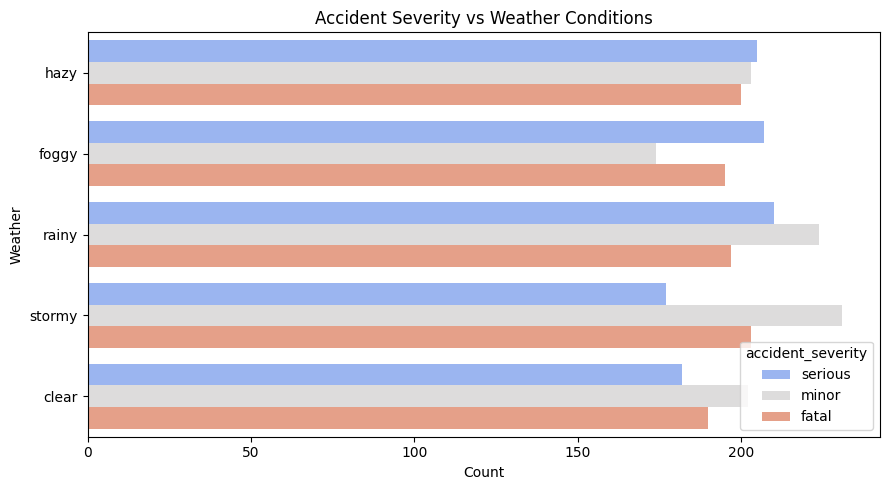

In [14]:
plt.figure(figsize=(9,5))
sns.countplot(data=df, y='weather_conditions', hue='accident_severity', palette='coolwarm')
plt.title('Accident Severity vs Weather Conditions')
plt.xlabel('Count')
plt.ylabel('Weather')
plt.tight_layout()
plt.show()


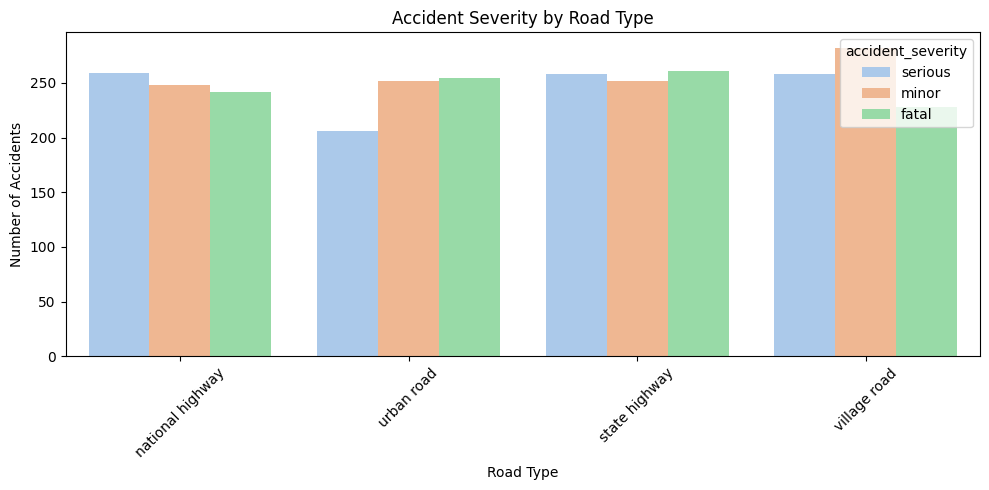

In [15]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='road_type', hue='accident_severity', palette='pastel')
plt.title('Accident Severity by Road Type')
plt.xlabel('Road Type')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
